## Data Science Bootcamp

### Table of contents:
* [Import biblioteki](#0)
* [Exercise 231](#1)
* [Exercise 232](#2)
* [Exercise 233](#3)
* [Exercise 234](#4)
* [Exercise 235](#5)
* [Exercise 236](#6)
* [Exercise 237](#7)
* [Exercise 238](#8)
* [Exercise 239](#9)
* [Exercise 240](#10)

### <a name='0'></a> Import of libraries

In [ ]:
import numpy as np
import pandas as pd

np.__version__

'1.18.4'

### <a name='1'></a> Exercise 231
Import the _tensorflow_ version 2.x library.

In [ ]:
%tensorflow_version 2.x
import tensorflow as tf

tf.__version__

'2.2.0'

Load Fashion MNIST data using the _tensorflow_ library. Training set (_X\_train_, _y\_train_) and test set (_X\_test_, _y\_test_) respectively.

In [ ]:
from tensorflow.keras.datasets.fashion_mnist import load_data

(X_train, y_train), (X_test, y_test) = load_data()

Check the size of training and test sets.

In [ ]:
print(f'X_train shape: {X_train.shape}')
print(f'y_train shape: {y_train.shape}')
print(f'X_test shape: {X_test.shape}')
print(f'y_test shape: {y_test.shape}')

X_train shape: (60000, 28, 28)
y_train shape: (60000,)
X_test shape: (10000, 28, 28)
y_test shape: (10000,)


### <a name='2'></a> Exercise 232
Using the _matplotlib_ library, display an image from the training set with the index 40.


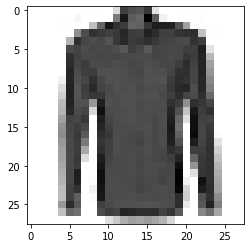

In [ ]:
import matplotlib.pyplot as plt

plt.imshow(X_train[40], cmap='gray_r')

Display class number for a sample from a training set with an index of 40.

In [ ]:
y_train[40]

6

### <a name='3'></a> Exercise 233

Standardize the data. Divide the values of the _X\_train_ and _X\_test_ tables by the value of 255.0.

In [ ]:
X_train = X_train / 255.
X_test = X_test / 255.

### <a name='4'></a> Exercise 234
Import the _Sequential_ class from the _tensorflow_ library using the _keras_ package.

In [ ]:
from tensorflow.keras.models import Sequential

Import the _Flatten_ and _Dense_ layers from the _tensorflow_ library using the _keras_ package.

In [ ]:
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense

### <a name='5'></a> Exercise 235
Build the _Sequential_ class model.

In [ ]:
model = Sequential()

Add the first layer of type _Flatten_ with the appropriately selected parameter _input_shape_.

In [ ]:
model.add(Flatten(input_shape=(28, 28)))

Add another layer of _Dense_ type with 128 neurons and _relu_ activation function.

In [ ]:
model.add(Dense(units=128, activation='relu'))

Add the last layer of type _Dense_ with 10 neurons and the activation function _softmax_.

In [ ]:
model.add(Dense(units=10, activation='softmax'))

Display model summary.

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


### <a name='6'></a> Exercise 236
Compile the model. Use the _rmsprop_ optimizer, the loss function _sparse_categorical_crossentropy_, and the _accuracy_ metric.

In [ ]:
model.compile(optimizer='rmsprop',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

### <a name='7'></a> Exercise 237
Fit the model to your training data by setting 10 epochs and `validation_split=0.2`.

In [ ]:
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

Epoch 1/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.5219 - accuracy: 0.8151 - val_loss: 0.4043 - val_accuracy: 0.8552
Epoch 2/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3871 - accuracy: 0.8612 - val_loss: 0.4272 - val_accuracy: 0.8545
Epoch 3/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3538 - accuracy: 0.8734 - val_loss: 0.3797 - val_accuracy: 0.8714
Epoch 4/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3325 - accuracy: 0.8808 - val_loss: 0.4456 - val_accuracy: 0.8544
Epoch 5/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3195 - accuracy: 0.8857 - val_loss: 0.3620 - val_accuracy: 0.8774
Epoch 6/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3090 - accuracy: 0.8904 - val_loss: 0.3617 - val_accuracy: 0.8831
Epoch 7/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3007 - accuracy: 0.8943 - val_loss: 0.3859 - val_accuracy:

### <a name='8'></a> Exercise 238
Predict test data based on the model.

In [ ]:
y_pred = model.predict_classes(X_test)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


Build a confusion matrix.

In [ ]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
cm

array([[807,   1,  28,  14,   2,   0, 139,   1,   8,   0],
       [  1, 969,   4,  19,   4,   0,   3,   0,   0,   0],
       [ 10,   1, 852,  13,  81,   0,  42,   0,   1,   0],
       [ 26,   9,  21, 865,  47,   0,  29,   0,   3,   0],
       [  0,   0, 141,  24, 793,   1,  41,   0,   0,   0],
       [  0,   0,   0,   1,   0, 947,   0,  26,   1,  25],
       [ 93,   1, 133,  32,  76,   0, 655,   0,  10,   0],
       [  0,   0,   0,   0,   0,  11,   0, 949,   0,  40],
       [  2,   0,   6,   6,   8,   2,   3,   5, 968,   0],
       [  0,   0,   0,   0,   0,   2,   1,  29,   0, 968]])

### <a name='9'></a> Exercise 239
Build the _DataFrame_ pandas object containing model predictions. Name the column _prediction_ and assign it to the variable _results_.

In [ ]:
results = pd.DataFrame(y_pred, columns=['prediction'])
results

,prediction
0,9
1,2
2,1
3,1
4,6
...,...
9995,9
9996,1
9997,8
9998,1


Assign a new column with the values from the _y\_test_ variable and name it _y\_test_.

In [ ]:
results['y_test'] = y_test
results

,prediction,y_test
0,9,9
1,2,2
2,1,1
3,1,1
4,6,6
...,...,...
9995,9,9
9996,1,1
9997,8,8
9998,1,1


Assign a new column called _is_misclassified_ that will return 1 if the samples are misclassified, otherwise 0.

In [ ]:
results['is_misclassified'] = (results['prediction'] != results['y_test']).astype('int')
results

,prediction,y_test,is_misclassified
0,9,9,0
1,2,2,0
2,1,1,0
3,1,1,0
4,6,6,0
...,...,...,...
9995,9,9,0
9996,1,1,0
9997,8,8,0
9998,1,1,0


### <a name='10'></a> Exercise 240
Save the _results_ to the _results.csv_ file.

In [ ]:
results.to_csv('results.csv', index=False)

In [ ]:
!head results.csv

prediction,y_test,is_misclassified
9,9,0
2,2,0
1,1,0
1,1,0
6,6,0
1,1,0
4,4,0
6,6,0
5,5,0
